# Step-by-step exercise

The proposed dataset collects the outcome of a survey for uncovering the satisfaction of airline passengers.
The **overall goal is to carry out a data mining process to predict passenger satisfaction**.

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:N/A; 1 (bad) - 5 (good))
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)


# Part 1
- Import the *airline-train.csv* dataset
- Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis

# Part 2
- Perform the required data preprocessing steps:
    - Handle missing values
    - Obtain a numeric representation of the categorical variables

# Part 3
- Fit a DecisionTree classifier on the training set (setting the maximum depth equal to 6)
- Evaluate and discuss results on the test set:
    - Import the *airline-test.csv* test set
    - Report and discuss the results on the test set

# Solution

# Part 1

hints:
- Display the first and the last entries
- Check the number of observations in the dataset
- Check the number of columns and their type and name
- Obtain and discuss summary statistics for each column
- Check correlation among numerical variables
- ...

## Import the *airline_train.csv* dataset

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('dataset', 'airline-train.csv'), index_col = 0)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


- The number of records is 103.904
- The number of attributes is 24

The automatic display necessarily omits some rows and some column. A cleaner visualization is often achieved by trasposing the dataframe.

In [3]:
df.head(5).T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3


## Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



- Obtain generic information about the dataset, including:
    - columns name
    - non null count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


Does it make sense?
- numerical
    - ID: it is just an incremental identifier, i can get rid of it ⛔️
    - Age: MIN 7, MAX 85 ✅
    - Flight distance: minimum value 31 (miles? km?) first quartile 414 (miles? km?).. suspiciously low values?! ⚠️
    - Departure Delay in Minutes: Minutes delayed when departure 0 --> 26h ✅
    - Arrival Delay in Minutes: Minutes delayed when Arrival 0 --> 26h ✅
- ordinal (from survey)
    - Inflight wifi service: Satisfaction level of the inflight wifi service -->  ⚠️ some zeros
    - Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient -->  ⚠️ some zeros
    - Ease of Online booking: Satisfaction level of online booking --> ⚠️ some zeros
    - Gate location: Satisfaction level of Gate location --> ⚠️ some zeros
    - Food and drink: Satisfaction level of Food and drink --> ⚠️ some zeros
    - Online boarding: Satisfaction level of online boarding --> ⚠️ some zeros
    - Seat comfort: Satisfaction level of Seat comfort --> ⚠️ some zeros
    - Inflight entertainment: Satisfaction level of inflight entertainment --> ⚠️ some zeros
    - On-board service: Satisfaction level of On-board service --> ⚠️ some zeros
    - Leg room service: Satisfaction level of Leg room service --> ⚠️ some zeros
    - Baggage handling: Satisfaction level of baggage handling --> ✅
    - Check-in service: Satisfaction level of Check-in service -->  ⚠️ some zeros
    - Inflight service: Satisfaction level of inflight service --> ⚠️ some zeros 
    - Cleanliness: Satisfaction level of Cleanliness --> ⚠️ some zeros


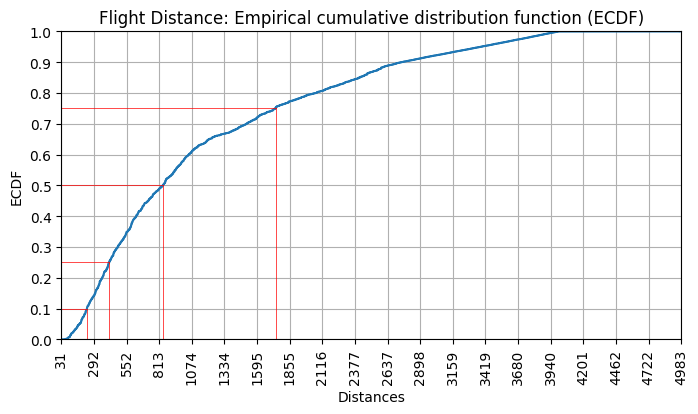

In [6]:
q = df['Flight Distance'].quantile([0.1, 0.25, 0.5, 0.75]).values

plt.figure(figsize = (8, 4))
# distanze dei voli sullle x e sulle y il valore della funzione di distribuzione.
x = sorted(df['Flight Distance'].values) 
y = np.arange(len(x)) / float(len(x))
plt.plot(x, y)
# inserire le griglie all'interno della tabella, per le x 20 righe verticali 
plt.xticks(np.linspace(x[0], x[-1], 20), rotation = 'vertical')
plt.yticks(np.linspace(y[0], y[-1], 11))
plt.ylim([0, 1])
plt.xlim([x[0], x[-1]])
plt.axhline(0.10, 0, (q[0] - x[0]) / (x[-1] - x[0]), color = 'red', linewidth = 0.5)
plt.axhline(0.25, 0, (q[1] - x[0]) / (x[-1] - x[0]), color = 'red', linewidth = 0.5)
plt.axhline(0.50, 0, (q[2] - x[0]) / (x[-1] - x[0]), color = 'red', linewidth = 0.5)
plt.axhline(0.75, 0, (q[3] - x[0]) / (x[-1] - x[0]), color = 'red', linewidth = 0.5)
plt.axvline(q[0], 0, 0.10, color = 'red', linewidth = 0.5)
plt.axvline(q[1], 0, 0.25, color = 'red', linewidth = 0.5)
plt.axvline(q[2], 0, 0.50, color = 'red', linewidth = 0.5)
plt.axvline(q[3], 0, 0.75, color = 'red', linewidth = 0.5)
plt.grid()

plt.title('Flight Distance: Empirical cumulative distribution function (ECDF)')
plt.ylabel('ECDF')
plt.xlabel('Distances')
plt.show()

- minimum distance is 31
- 10 percentile is around 240
- 25 percentile is around 400

Seem like too low values for short-haul flights, but they make up a large part of the distribution. We opt to keep them but it would be interesting to know their genesis.

Assuming miles as the unit of measurement, 5000 miles is reasonable as distance for long-haul flights.

In [7]:
df.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


Does it make sense? it would seem so..
- Gender: Gender of the passengers (Female, Male) ✅
- Customer Type: The customer type (Loyal customer, disloyal customer) ✅
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) ✅
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) ✅
- Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction) ✅


In [8]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
310 / 103904 * 100

0.29835232522328303

- there are 310 records with a missing value in the attribute "Arrival Delay in Minutes" (0.3% of overall records)


In [10]:
df.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

In [11]:
numerical_variables = ['Age',
                       'Flight Distance',
                       'Departure Delay in Minutes', 
                       'Arrival Delay in Minutes']

nominal_variables = ['Gender',
                     'Customer Type', 
                     'Type of Travel', 
                     'Class']

ordinal_variables = list(set(df.columns) - set(numerical_variables + nominal_variables + ['satisfaction', 'id']))

In [12]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [13]:
df["satisfaction"].value_counts(normalize = True) # to get percentages

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

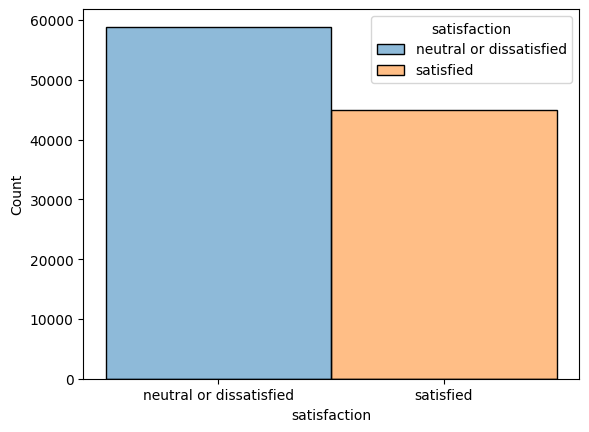

In [29]:
import seaborn as sns
sns.histplot(data = df,
             x = "satisfaction",
             hue = "satisfaction")
plt.show()

- This is a two-class classification problem
- The dataset is slightly imbalanced, with 'satisfied' class (45K instances) slightly less represented than the 'neutral or dissatisfied' class (59K instances)

### Numerical variables plots

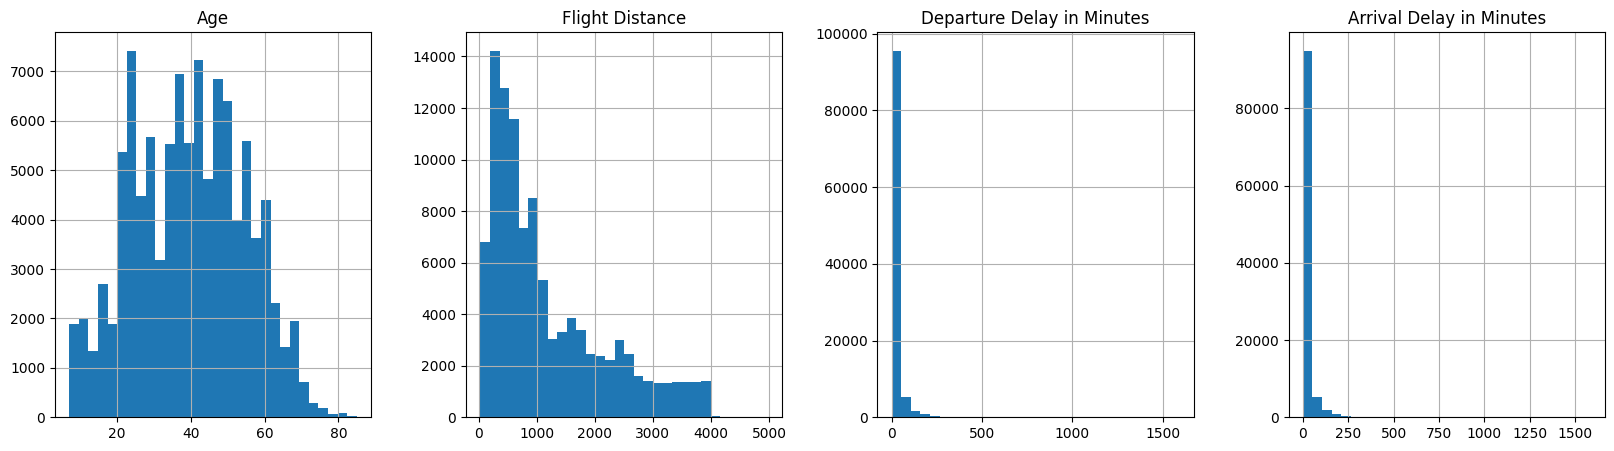

In [33]:
df[numerical_variables].hist(bins = 30,
                             layout = (1, 4),
                             figsize = (20, 5))
plt.show()

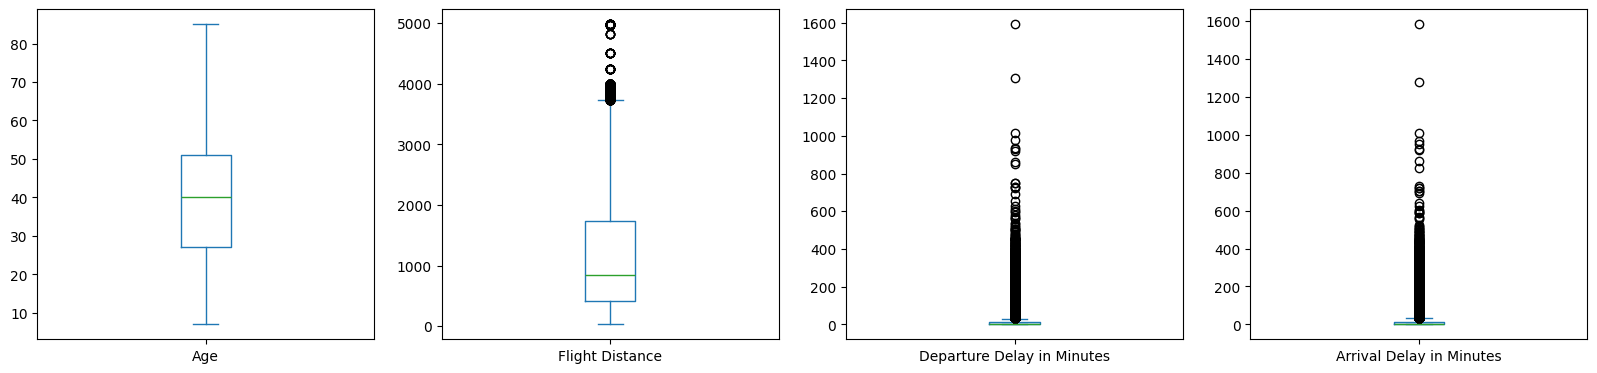

In [16]:
df[numerical_variables].plot(kind = 'box', 
                             subplots = True, 
                             figsize = (20, 30),
                             layout = (6, 4))
plt.show()

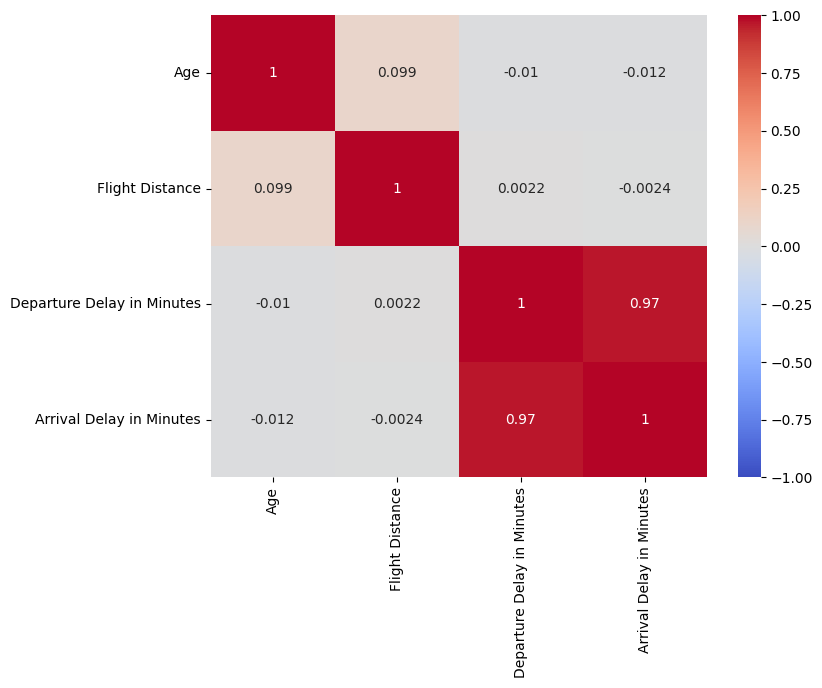

In [17]:
plt.figure(figsize = (8, 6))
sns.heatmap(df[numerical_variables].corr(), 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            cmap = "coolwarm")
plt.show()

- "Departure Delay" and "Arrival Delay" are highly correlated
- One of them can be dropped. I will opt for dropping Arrival Delay.

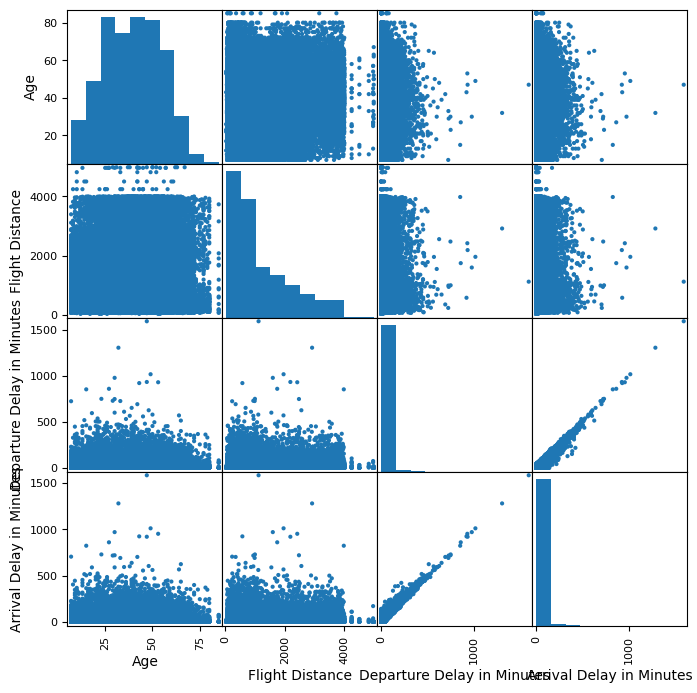

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_variables],
               figsize = (8, 8),
               alpha = 1,
               diagonal = 'hist')
plt.show()

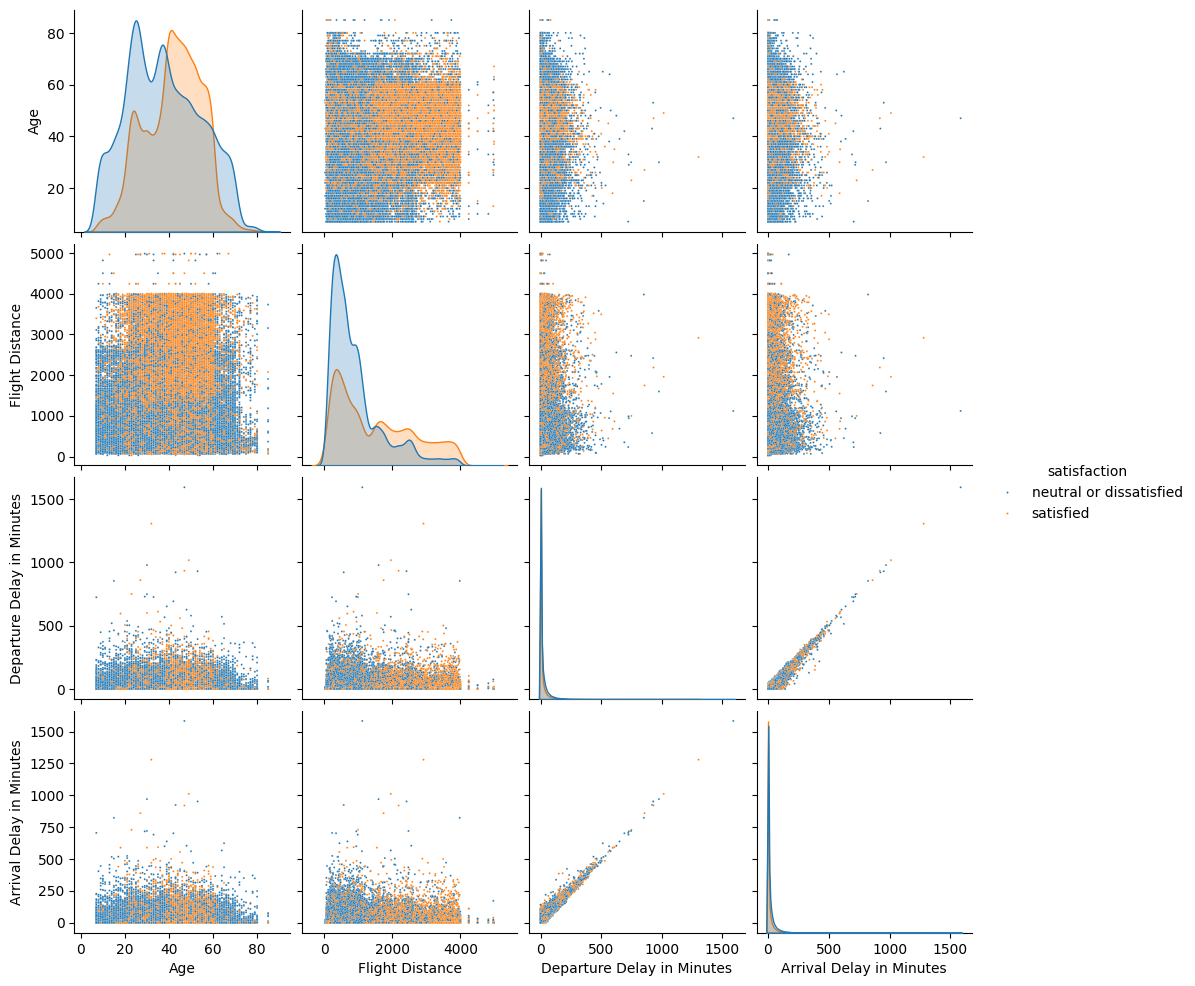

In [19]:
sns.pairplot(data = df[numerical_variables + ['satisfaction']],
             hue = 'satisfaction',
             plot_kws = {"s": 2} # adapt the markersize
            )

### Ordinal variables plots

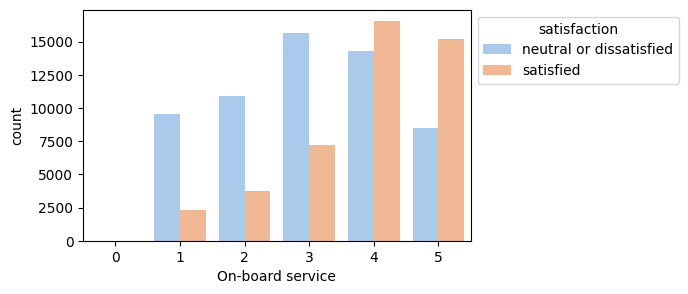

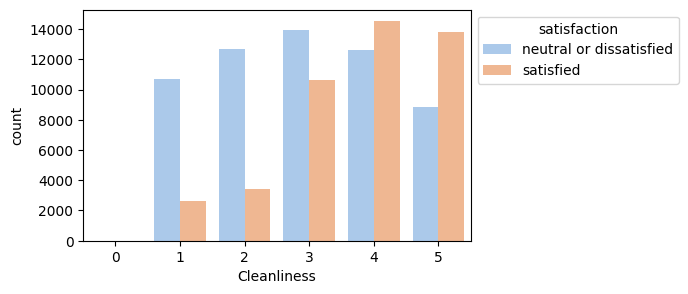

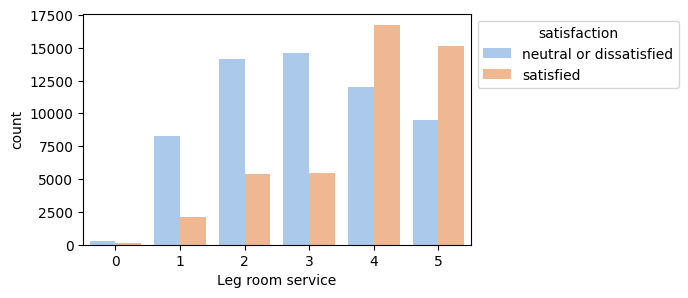

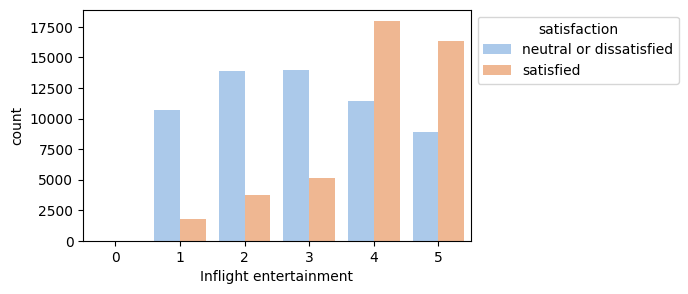

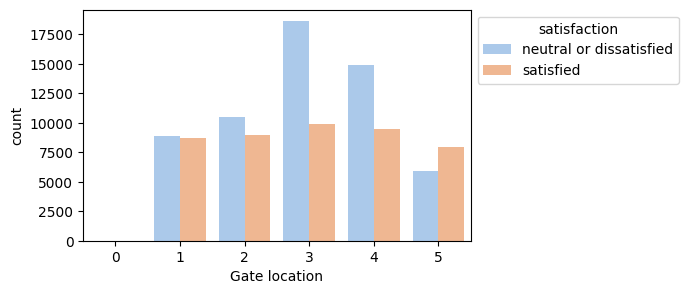

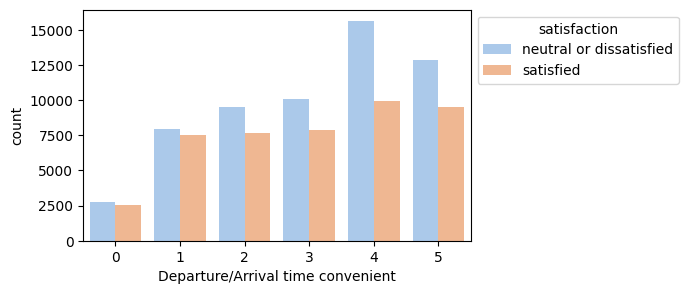

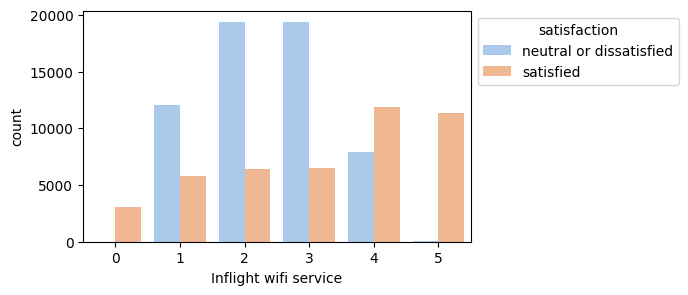

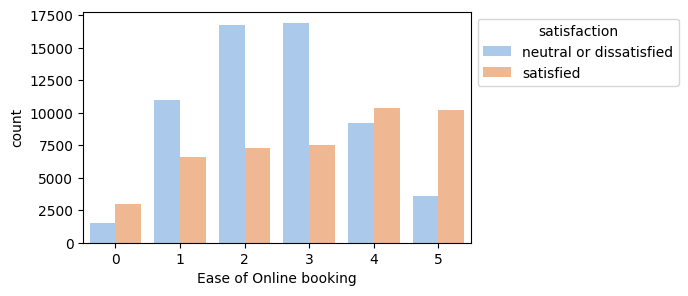

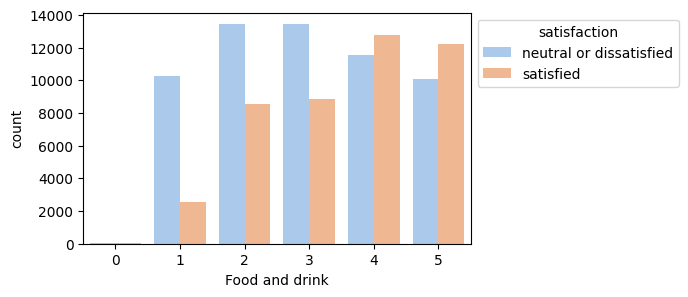

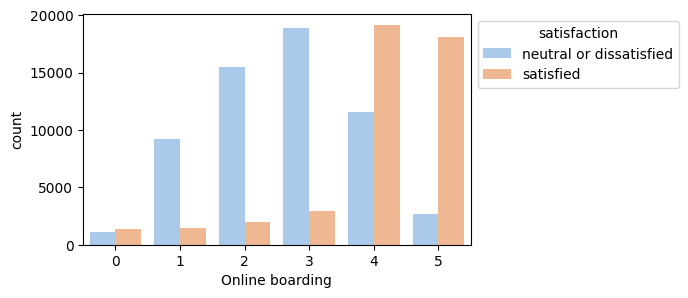

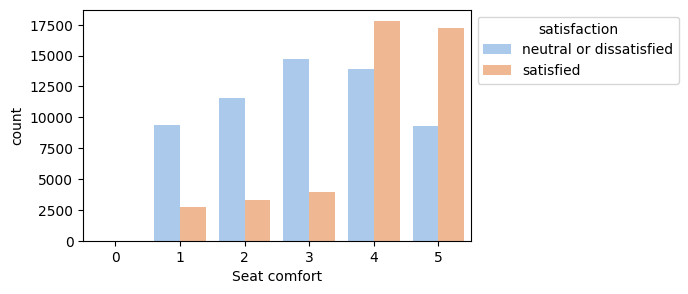

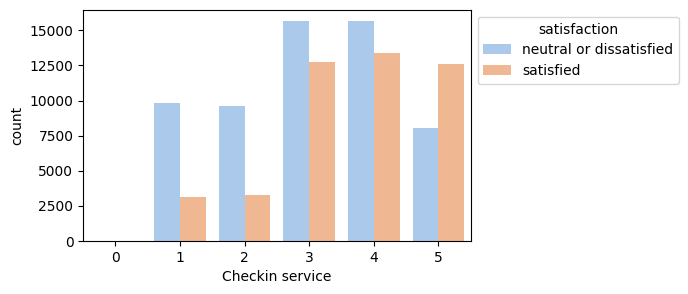

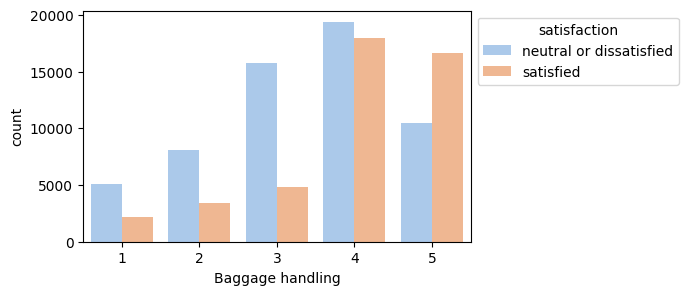

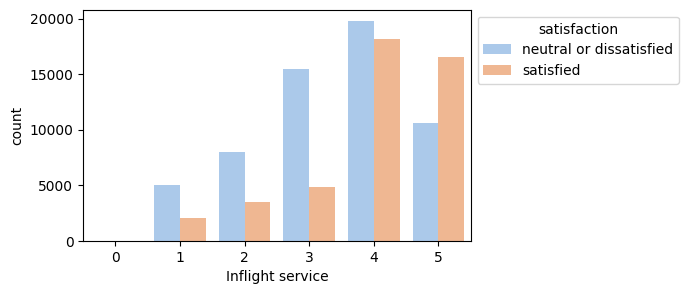

In [20]:
for col in ordinal_variables:
    f,ax = plt.subplots(figsize = (5,3))
    sns.countplot(x = col, 
                  data = df, 
                  hue = "satisfaction", 
                  hue_order =  df['satisfaction'].value_counts().index,
                  palette = "pastel")
    sns.move_legend(ax, 
                    "upper left", 
                    bbox_to_anchor = (1, 1))
    plt.show()

- general trend: the majority of those who rate a service "low" are "dissatisfied", and vice versa.

In [21]:
mask = df[ordinal_variables] == 0
for l in mask.columns:
    print(mask[l].value_counts(normalize = True))

On-board service
False    0.999971
True     0.000029
Name: proportion, dtype: float64
Cleanliness
False    0.999885
True     0.000115
Name: proportion, dtype: float64
Leg room service
False    0.995457
True     0.004543
Name: proportion, dtype: float64
Inflight entertainment
False    0.999865
True     0.000135
Name: proportion, dtype: float64
Gate location
False    0.99999
True     0.00001
Name: proportion, dtype: float64
Departure/Arrival time convenient
False    0.948991
True     0.051009
Name: proportion, dtype: float64
Inflight wifi service
False    0.970136
True     0.029864
Name: proportion, dtype: float64
Ease of Online booking
False    0.956816
True     0.043184
Name: proportion, dtype: float64
Food and drink
False    0.99897
True     0.00103
Name: proportion, dtype: float64
Online boarding
False    0.976632
True     0.023368
Name: proportion, dtype: float64
Seat comfort
False    0.99999
True     0.00001
Name: proportion, dtype: float64
Checkin service
False    0.99999
True    

- As noticed before, it seems strange that some surveys are between 1 and 5 and some others include also 0. Possibly indicating a missing value?

In [22]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [23]:
df[ordinal_variables] = df[ordinal_variables].replace(0, np.nan)
df[ordinal_variables].isna().sum()

On-board service                        3
Cleanliness                            12
Leg room service                      472
Inflight entertainment                 14
Gate location                           1
Departure/Arrival time convenient    5300
Inflight wifi service                3103
Ease of Online booking               4487
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Checkin service                         1
Baggage handling                        0
Inflight service                        3
dtype: int64

In [24]:
check_idx = df[df['Inflight service'].isna()].index
df.loc[check_idx].T

,466,51397,88714
id,17357,50151,124999
Gender,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer
Age,49,50,53
Type of Travel,Business travel,Business travel,Business travel
Class,Business,Business,Business
Flight Distance,1600,3256,184
Inflight wifi service,2.0,2.0,2.0
Departure/Arrival time convenient,5.0,5.0,3.0
Ease of Online booking,5.0,5.0,3.0


### Nominal variables plots

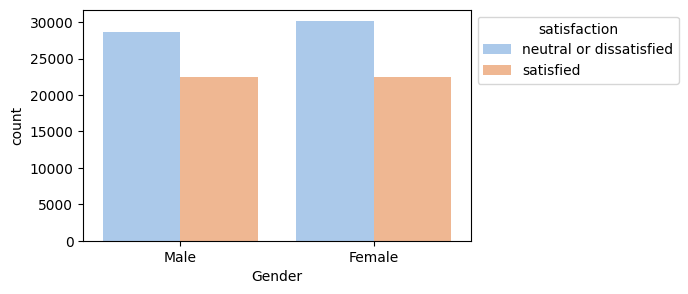

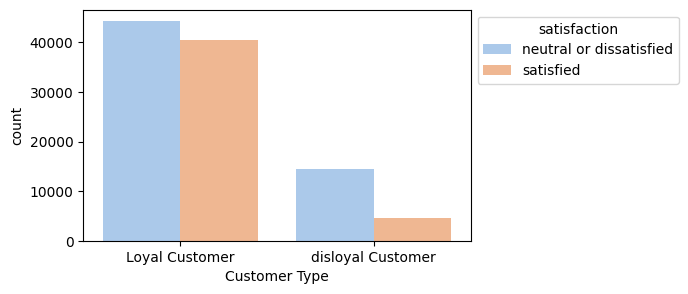

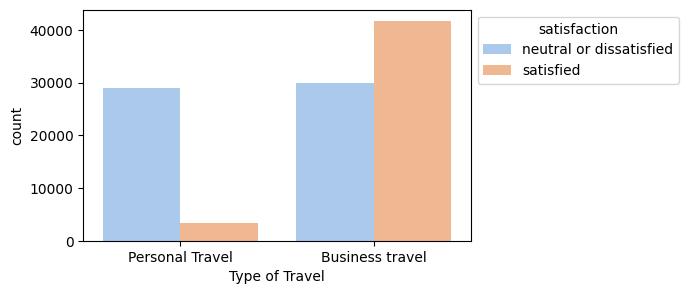

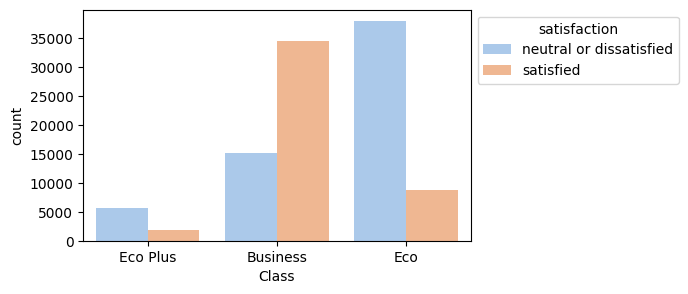

In [25]:
for col in nominal_variables:
    f,ax = plt.subplots(figsize = (5, 3))
    sns.countplot(x = col, 
                  data = df, 
                  hue = "satisfaction", 
                  palette = "pastel")
    sns.move_legend(ax, 
                    "upper left", 
                    bbox_to_anchor = (1, 1))
    plt.show()

- Some trends:
    - The percentage of satisfied customers is higher in the business class and lower in eco and eco plus classes
    - The percentage of satisfied customers is higher in business travel and very low in personal travel
    - The gender does not seem to have an impact
- The flight class (Eco, Eco Plus, Business) is probably an ordinal variable (that can be respectively mapped into (0,1,2)). I will opt for transforming it according to such a mapping.

# Part 2

## Perform the required data preprocessing steps 
- handle missing values
- obtain a numeric representation of the categorical variables.


In [26]:
# TODO

# Part 3

## Fit a DecisionTree classifier on the training set (max_depth=3)

In [27]:
# TODO